## IMPORTING THE REQUIRED LIBRARIES

In [2]:
# For Data Manipulation
import json
import pandas as pd
import numpy as np

# For Balancing the imbalanced data
from imblearn.combine import SMOTETomek

# For Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

# For prediction
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, roc_auc_score
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier

from xgboost import XGBClassifier

## IMPORTING THE DATA FILE

In [3]:
data=pd.read_excel("customer_data.xlsx")

In [13]:
# Understanding the content and the data provided

data.head(4)

,Full name,Age,Marital Status,Gender,Which type of organization do you work for?,Name of Profession,What is the type of home that you own?,Number of Floors in House,How many people live in your household(including children)?,No of Rooms in your house,...,Which one would you prefer?,Which one would you prefer ?,Do you have any relative/friend that bought a solar system?,Do you know any Solar Panel installation companies ?,Name the Solar company you know,Who owns the house you live in?,Which city is your house at?,Are you filling this form on behalf of your parents/others?,What are your computer brands?,State Name
0,sweta singh,15-25,Single,Female,Private,hr,Flat(On Rent),4+,NaN,3,...,Saving 1000+/month saving on electricity bill ...,4-star rated appliance,NaN,No,peacock solar,NaN,NaN,NaN,NaN,NaN
1,Ajay Babu,15-25,Single,Male,Private,Logistics,Independent house or Villa,Ground Floor,5.0,4,...,Avail solar electricity at 50% down payment an...,4-star rated appliance,No,Yes,Roofsol,NaN,NaN,NaN,NaN,NaN
2,Ajumal Khan A,15-25,Single,Male,Business,Self Employed,Independent house or Villa,2 Floors,5.0,4,...,Avail solar electricity at 50% down payment an...,5-star rated appliance (with Extra services an...,NaN,No,Enerparc,NaN,NaN,NaN,NaN,NaN
3,Navya Venugopal,15-25,Single,Female,NGO,social worker,Flat(On Rent),3 Floors,3.0,1,...,Saving 1000+/month saving on electricity bill ...,4-star rated appliance,No,No,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
unnamed_cols = [x for x in data.columns if 'Unnamed' in x]
data = data.drop(unnamed_cols, axis=1)

In [15]:
data.head(3)

,Full name,Age,Marital Status,Gender,Which type of organization do you work for?,Name of Profession,What is the type of home that you own?,Number of Floors in House,How many people live in your household(including children)?,No of Rooms in your house,...,Which one would you prefer?,Which one would you prefer ?,Do you have any relative/friend that bought a solar system?,Do you know any Solar Panel installation companies ?,Name the Solar company you know,Who owns the house you live in?,Which city is your house at?,Are you filling this form on behalf of your parents/others?,What are your computer brands?,State Name
0,sweta singh,15-25,Single,Female,Private,hr,Flat(On Rent),4+,NaN,3,...,Saving 1000+/month saving on electricity bill ...,4-star rated appliance,NaN,No,peacock solar,NaN,NaN,NaN,NaN,NaN
1,Ajay Babu,15-25,Single,Male,Private,Logistics,Independent house or Villa,Ground Floor,5.0,4,...,Avail solar electricity at 50% down payment an...,4-star rated appliance,No,Yes,Roofsol,NaN,NaN,NaN,NaN,NaN
2,Ajumal Khan A,15-25,Single,Male,Business,Self Employed,Independent house or Villa,2 Floors,5.0,4,...,Avail solar electricity at 50% down payment an...,5-star rated appliance (with Extra services an...,NaN,No,Enerparc,NaN,NaN,NaN,NaN,NaN


In [16]:
data.columns = [x.strip() for x in data.columns.tolist()]
data.columns.tolist()

['Full name',
 'Age',
 'Marital Status',
 'Gender',
 'Which type of organization do you work for?',
 'Name of Profession',
 'What is the type of home that you own?',
 'Number of Floors in House',
 'How many people live in your household(including children)?',
 'No of Rooms in your house',
 'Do you plan to build an additional floor? (If other, what does it depend on?)',
 'What percentage of your roof are you ready to give for solar?',
 'Plot size of the house (In Square yards)',
 'Do you have a home loan?',
 'How many of the below vehicles do you own? [2-Wheelers]',
 'How many of the below vehicles do you own? [4-Wheelers]',
 'Which payment method do you use the most?',
 'Do you currently have an EMI for any home appliance?',
 "What is the range of your family's average monthly earnings?",
 'Rate the following websites in terms of your usage time [Google]',
 'Rate the following websites in terms of your usage time [Facebook]',
 'Rate the following websites in terms of your usage time [W

In [17]:
data.columns = [x.replace('[', '-').replace(']', '-').replace('<', 'lt').replace('>', 'gt') for x in data.columns]

In [18]:
len(data.columns)

63

In [19]:
target_proxy = 'What Power Backup do you use?'
predictors = [x for x in data.columns if x != target_proxy]

In [20]:
data[target_proxy] = data[target_proxy].str.lower()
data['target'] = np.where(data[target_proxy].str.contains('solar'), 1, 0)
data['target'].value_counts(normalize=True)*100

0    94.518549
1     5.481451
Name: target, dtype: float64

In [79]:
target_df = pd.DataFrame(data['target'].value_counts(), index=[0,1]).T
target_df

,0,1
target,4535,263


In [85]:
bar_value = [x for x in target_df.iloc[0,]]

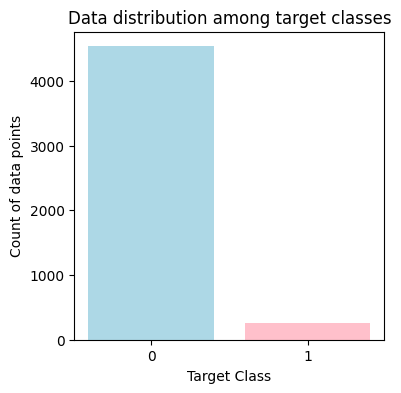

In [92]:
fig = plt.subplots(figsize =(4, 4)) 
plt.bar(['0','1'], bar_value, color=['lightblue','pink'])
plt.xlabel("Target Class")
plt.ylabel("Count of data points")
plt.title("Data distribution among target classes")
plt.show()

# Segregating predictors based on datatype

In [164]:
numerical_features = []
object_features = []
for pred in predictors:
    if data[pred].dtypes == float:
        numerical_features.append(pred)
    if data[pred].dtypes == object:
        object_features.append(pred)

len(numerical_features), len(object_features)    

(25, 37)

In [165]:
numerical_features

['How many people live in your household(including children)?',
 'Rate the following websites in terms of your usage time -Google-',
 'Rate the following websites in terms of your usage time -Facebook-',
 'Rate the following websites in terms of your usage time -Whatsapp-',
 'Rate the following websites in terms of your usage time -Youtube-',
 'Rate the following websites in terms of your usage time -Other sites-',
 'How much aware are you about solar?',
 'Rate the importance of these factors in your solar purchase decision (1=least important, 5=most important) -Power backup-',
 'Rate the importance of these factors in your solar purchase decision (1=least important, 5=most important) - Increase in electricity prices.-',
 'Rate the importance of these factors in your solar purchase decision (1=least important, 5=most important) -Fairly good saving on the power bill today-',
 'Rate the importance of these factors in your solar purchase decision (1=least important, 5=most important) -Lon

In [166]:
object_features

['Full name',
 'Age',
 'Marital Status',
 'Gender',
 'Which type of organization do you work for?',
 'Name of Profession',
 'What is the type of home that you own?',
 'Number of Floors in House',
 'No of Rooms in your house',
 'Do you plan to build an additional floor? (If other, what does it depend on?)',
 'What percentage of your roof are you ready to give for solar?',
 'Plot size of the house (In Square yards)',
 'Do you have a home loan?',
 'How many of the below vehicles do you own? -2-Wheelers-',
 'How many of the below vehicles do you own? -4-Wheelers-',
 'Which payment method do you use the most?',
 'Do you currently have an EMI for any home appliance?',
 "What is the range of your family's average monthly earnings?",
 'What electrical appliances do you own?',
 'What are your appliances brands?  -AC-',
 'What are your appliances brands?  -Refrigerator-',
 'What are your appliances brands?  -Computer-',
 'What are your appliances brands?  -TV-',
 'What are your appliances brands

# Preprocessing

In [167]:
pd.DataFrame(data[predictors].isna().sum()/data.shape[0]*100, columns=['nullrate']).sort_values('nullrate', ascending=False)

,nullrate
State Name,100.000000
What are your appliances brands? -Computer-,79.495728
What are your computer brands?,20.921025
What is the next appliance you want to buy?,18.399667
Name the Solar company you know,13.169410
...,...
Rate the following websites in terms of your usage time -Google-,0.020838
What is the range of your family's average monthly earnings?,0.020838
Which payment method do you use the most?,0.020838
"To what extent would the following factors discourage you from installing solar? (1=least important, 5=most important) -Number of years it takes for the investment to pay back (usually gt 10 years)-",0.020838


#### Observations
- State Name is completely empty
- Full name isn't a meaningful predictor

In [168]:
predictors = [x for x in predictors if x not in ['State Name', 'Full name']]

#### To maintain uniformity in the data, filling in the columns that have missing values using Mean, Median or Mode where necessary

In [172]:
temp_data = data[['What are your appliances brands?  -Computer-', 'target']].fillna('Unknown')
temp_data.groupby('What are your appliances brands?  -Computer-').target.mean()*100

What are your appliances brands?  -Computer-
Blue Star    13.043478
Daiken        0.000000
Godrej        0.000000
Haier        12.500000
Hitachi       4.545455
IFB           0.000000
LG            4.838710
Other         3.159851
Panasonic     0.000000
Samsung       3.157895
Unknown       5.661861
Videocon     11.111111
Whirlpool     0.000000
Name: target, dtype: float64

In [173]:
temp_data2 = data[['What are your computer brands?', 'target']].fillna('Unknown')
pd.DataFrame(temp_data2.groupby('What are your computer brands?').target.mean()*100).sort_values('target', ascending=False)

,target
What are your computer brands?,
No,100.000000
My own,100.000000
Bsdk,100.000000
Assembled gaming Pc,100.000000
Toshiba,16.666667
...,...
Haldiram,0.000000
HP and Lenovo,0.000000
HCL,0.000000


In [174]:
# dict(temp_data2['What are your computer brands?'].value_counts())

In [175]:
data[predictors].describe().T

,count,mean,std,min,25%,50%,75%,max
How many people live in your household(including children)?,4797.0,4.632062,2.007990,1.0,3.0,4.0,5.0,10.0
Rate the following websites in terms of your usage time -Google-,4798.0,2.979158,1.419357,1.0,2.0,3.0,4.0,5.0
Rate the following websites in terms of your usage time -Facebook-,4798.0,2.399750,1.282268,1.0,1.0,2.0,3.0,5.0
Rate the following websites in terms of your usage time -Whatsapp-,4798.0,2.954981,1.357679,1.0,2.0,3.0,4.0,5.0
Rate the following websites in terms of your usage time -Youtube-,4798.0,2.939975,1.242255,1.0,2.0,3.0,4.0,5.0
Rate the following websites in terms of your usage time -Other sites-,4798.0,2.630263,1.336463,1.0,1.0,3.0,4.0,5.0
How much aware are you about solar?,4798.0,3.565444,1.203060,1.0,3.0,4.0,5.0,5.0
"Rate the importance of these factors in your solar purchase decision (1=least important, 5=most important) -Power backup-",4798.0,3.300125,1.350871,1.0,2.0,3.0,5.0,5.0
"Rate the importance of these factors in your solar purchase decision (1=least important, 5=most important) - Increase in electricity prices.-",4798.0,3.054189,1.281831,1.0,2.0,3.0,4.0,5.0
"Rate the importance of these factors in your solar purchase decision (1=least important, 5=most important) -Fairly good saving on the power bill today-",4798.0,3.345977,1.249029,1.0,3.0,3.0,4.0,5.0


In [176]:
def_rate_per_class = {}
for pred in predictors:
    temp_data = data[[pred, 'target']].fillna('None')
    def_rate_per_class[pred] = temp_data.groupby(pred).agg({'target': ['count', 'mean']})

## Cleaning the data

#### To establish uniformity in the 'Which city is your house at' column, each city is raised to the level of its respective states so that the data can provide better and efficient results

In [177]:
STATE_CITY_MAP = json.load(open('State_city_map.json', 'r'))
STATE_CITY_MAP.keys()

dict_keys(['Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar', 'Chhattisgarh', 'Dadra and Nagar Haveli', 'Daman and Diu', 'Delhi', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu and Kashmir', 'Jharkhand', 'Karnataka', 'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Orissa', 'Puducherry', 'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal'])

In [178]:
def city_to_state(city):
    for state, cities in STATE_CITY_MAP.items():
        if city in cities:
            return(state)
    return 'None'
            

In [179]:
data["State Name"]=data["Which city is your house at?"].apply(city_to_state)
data['State Name'].value_counts(dropna=False, normalize=True)*100


State Name
None                 51.114816
Delhi                 8.376745
Uttar Pradesh         7.980829
Maharashtra           4.334236
Gujarat               4.167535
Haryana               3.750781
Andhra Pradesh        3.646593
Bihar                 2.896437
Madhya Pradesh        2.771411
West Bengal           2.625547
Orissa                1.625339
Rajasthan             1.500313
Punjab                1.000208
Tamil Nadu            0.854345
Jharkhand             0.791832
Uttarakhand           0.625130
Kerala                0.479267
Chhattisgarh          0.333403
Karnataka             0.333403
Himachal Pradesh      0.312565
Assam                 0.250052
Jammu and Kashmir     0.083351
Puducherry            0.041675
Daman and Diu         0.041675
Nagaland              0.020838
Manipur               0.020838
Meghalaya             0.020838
Name: proportion, dtype: float64

In [180]:
(data.groupby('State Name').agg({'target': ['count', 'mean']})*100).sort_values(('target', 'mean'), ascending=False)

target           
                    count       mean
State Name                          
Himachal Pradesh     1500  13.333333
Kerala               2300  13.043478
Uttarakhand          3000  10.000000
Maharashtra         20800   8.653846
Rajasthan            7200   8.333333
Madhya Pradesh      13300   8.270677
Bihar               13900   6.474820
Orissa               7800   6.410256
Punjab               4800   6.250000
Gujarat             20000   5.500000
Uttar Pradesh       38300   5.483029
None               245300   5.421932
Jharkhand            3800   5.263158
Haryana             18000   4.444444
Andhra Pradesh      17500   4.000000
Delhi               40200   3.980100
West Bengal         12600   3.968254
Tamil Nadu           4100   2.439024
Manipur               100   0.000000
Meghalaya             100   0.000000
Nagaland              100   0.000000
Assam                1200   0.000000
Karnataka            1600   0.000000
Puducherry            200   0.000000
Jammu and Kashmir     400   0.000000
Daman and Diu         200   0.000000
Chhattisgarh         1600   0.000000

In [181]:
numerical_features.remove('State Name')

In [182]:
object_features.append('State Name')

In [183]:
object_features.remove('Full name')

In [184]:
object_features

['Age',
 'Marital Status',
 'Gender',
 'Which type of organization do you work for?',
 'Name of Profession',
 'What is the type of home that you own?',
 'Number of Floors in House',
 'No of Rooms in your house',
 'Do you plan to build an additional floor? (If other, what does it depend on?)',
 'What percentage of your roof are you ready to give for solar?',
 'Plot size of the house (In Square yards)',
 'Do you have a home loan?',
 'How many of the below vehicles do you own? -2-Wheelers-',
 'How many of the below vehicles do you own? -4-Wheelers-',
 'Which payment method do you use the most?',
 'Do you currently have an EMI for any home appliance?',
 "What is the range of your family's average monthly earnings?",
 'What electrical appliances do you own?',
 'What are your appliances brands?  -AC-',
 'What are your appliances brands?  -Refrigerator-',
 'What are your appliances brands?  -Computer-',
 'What are your appliances brands?  -TV-',
 'What are your appliances brands?  -Water Heat

In [185]:
label_encoder = LabelEncoder()

for feat in object_features:
    data[f'{feat}_encoded'] = label_encoder.fit_transform(data[feat])

# Prediction

In [186]:
predictors_2 = numerical_features + [f'{feat}_encoded' for feat in object_features]
len(predictors_2)

61

In [187]:
def gini(y_pred, y_true):
    return abs(200 * roc_auc_score(y_true, y_pred) - 100)

In [189]:
gini_dict = {}
for pred in predictors_2:
    if data[pred].dtypes in (float, int):
        temp_data = data[data[pred].notna()]
        gini_dict[pred] = gini(temp_data[pred], temp_data['target'])

pd.DataFrame(gini_dict, index=['gini']).T.sort_values('gini', ascending=False)

,gini
Do you have any relative/friend that bought a solar system?_encoded,30.828238
Do you know any Solar Panel installation companies ?_encoded,25.040510
What maximum investment would you be willing to make in solar?_encoded,20.573569
"To what extent would the following factors discourage you from installing solar? (1=least important, 5=most important) -Not getting sufficient money for extra power generated -",12.118839
"Do you plan to build an additional floor? (If other, what does it depend on?)_encoded",11.705172
...,...
Rate the following websites in terms of your usage time -Facebook-,0.764229
Do you have a home loan?_encoded,0.691006
Which one would you prefer ?_encoded,0.325749
Which city is your house at?_encoded,0.188266


#### Splitting the data into train and test

In [190]:
data[predictors_2] = data[predictors_2].fillna(-1)

In [191]:
x_train, x_test, y_train, y_test = train_test_split(data[predictors_2], data['target'], test_size=0.3, random_state=1)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((3359, 61), (1440, 61), (3359,), (1440,))

#### Applying Logistic Regression Classifier

In [192]:
model1 = LogisticRegressionCV(cv=5, solver='liblinear', penalty='l1', max_iter=500, random_state=1)
model1.fit(x_train, y_train)

LogisticRegressionCV(cv=5, max_iter=500, penalty='l1', random_state=1,
                     solver='liblinear')

In [196]:
y_testpred1 = model1.predict_proba(x_test)[:,1]

In [197]:
gini(y_testpred1, y_test)

1.6650422352176832

In [198]:
model2 = XGBClassifier()

In [199]:
model2.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [200]:
y_testpred2 = model2.predict_proba(x_test)[:,1]

In [201]:
gini(y_testpred2, y_test)

41.98140025990904

In [206]:
feat_imp = pd.DataFrame({'feature': predictors_2, 'importance': model2.feature_importances_}).sort_values('importance', ascending=False)
feat_imp

,feature,importance
53,Do you have any relative/friend that bought a ...,0.065154
17,To what extent would the following factors dis...,0.024662
6,How much aware are you about solar?,0.024213
9,Rate the importance of these factors in your s...,0.023658
50,What maximum investment would you be willing t...,0.023127
...,...,...
7,Rate the importance of these factors in your s...,0.009793
30,Number of Floors in House_encoded,0.008487
4,Rate the following websites in terms of your u...,0.007301
52,Which one would you prefer ?_encoded,0.004564


In [208]:
feat_imp[feat_imp['importance'] > 0.02].shape

(14, 2)

In [214]:
predictors_3 = feat_imp[feat_imp['importance'] > 0.02].feature.tolist()

In [227]:
model3 = XGBClassifier(
    learning_rate=0.02,
    subsample=0.6,
    colsample_bytree=0.8,
    max_depth=5,
    min_child_weight=3,
    eval_metric='auc',
    objective= 'binary:logistic',
)

In [228]:
model3.fit(x_train, y_train)
y_testpred3 = model3.predict_proba(x_test)[:, 1]

gini(y_testpred3, y_test)

47.23440545808967

In [234]:
y_trainpred3 = model3.predict_proba(x_train)[:, 1]
gini(y_trainpred3, y_train)

86.09093779602148

#### Applying Random Forest Classifier

In [209]:
clf = RandomForestClassifier(random_state=1, n_estimators=250, criterion='gini', n_jobs=-1)
clf.fit(x_train, y_train)

cross_val = cross_val_score(clf, x_train, y_train, cv=10, n_jobs=-1)
print ('Cross Validation Mean Result: ',cross_val.mean())

# Predicted Results
y_pred = clf.predict(x_test)

print("Test Score: ", clf.score(x_test,y_test))

Cross Validation Mean Result:  0.94284026297086
Test Score:  0.95


In [230]:
y_predforest_train = clf.predict_proba(x_train)[:,1]
gini(y_predforest_train, y_train)

100.0

In [212]:
y_predforest = clf.predict_proba(x_test)[:,1]

In [213]:
gini(y_predforest, y_test)

46.538945743989615

In [ ]:
# Evaluation of the result using Confusion Matrix
confusion_matrix(y_test,y_pred)

In [ ]:
# Analyzing the Classification Report
print(classification_report(y_test,y_pred))

## DATA VISUALIZATION

#### Extracting Important Feature and Analyzing them

In [ ]:
list_of_features=[]
count=0
imp=tuple(imp_features['Features'])
for i in imp:
    if count==10:
        break
    else:
        list_of_features.append(i)
        count+=1

In [ ]:
age_tuple=tuple(data['Age '])
marital_tuple=tuple(data['Marital Status'])
gender_tuple=tuple(data['Gender'])
salary_tuple=tuple(data["What is the range of your family's average monthly earnings?"])
google_tuple=tuple(data['Rate the following websites in terms of your usage time [Google]'])
facebook_tuple=tuple(data['Rate the following websites in terms of your usage time [Facebook]'])
whatsapp_tuple=tuple(data['Rate the following websites in terms of your usage time [Whatsapp]'])
youtube_tuple=tuple(data['Rate the following websites in terms of your usage time [Youtube]'])

#-----x------

ac_tuple=tuple(data['What are your appliances brands?  [AC]'])
roof_tuple=tuple(data['What percentage of your roof are you ready to give for solar?'])
refrigerator_tuple=tuple(data['What are your appliances brands?  [Refrigerator]'])
vehicle4_tuple=tuple(data['How many of the below vehicles do you own? [4-Wheelers]'])
vehicle2_tuple=tuple(data['How many of the below vehicles do you own? [2-Wheelers]'])
floors_tuple=tuple(data['Number of Floors in House'])
rooms_tuple=tuple(data['No of Rooms in your house '])

In [ ]:
age_n={}
age_y={}

marital_n={}
marital_y={}

gender_n={}
gender_y={}

salary_n={}
salary_y={}

google_n={}
google_y={}

facebook_n={}
facebook_y={}

whatsapp_n={}
whatsapp_y={}

youtube_n={}
youtube_y={}

ac_n={}
ac_y={}

roof_n={}
roof_y={}

refrigerator_n={}
refrigerator_y={}

vehicle4_n={}
vehicle4_y={}

vehicle2_n={}
vehicle2_y={}

floors_n={}
floors_y={}

rooms_n={}
rooms_y={}

#solar_y_n=tuple(data['Solar Panel Purchased or Not'])

#### ANALYZING EACH FACTOR AND ASSESSING THE OUTPUTS CONCERNING WHETHER THE CUSTOMER PURCHASES THE SOLAR PANEL OR NOT

AGE

In [ ]:
for i,j in zip(age_tuple,solar_y_n):
    if j=='No':
        if i in age_n:
            age_n[i]+=1
        else:
            age_n[i]=1
            
    elif j=='Yes':
        if i in age_y:
            age_y[i]+=1
        else:
            age_y[i]=1
            
age_y,age_n

In [ ]:
x1=np.arange(0,4,1)

In [ ]:
plt.bar(x1,age_y.values(),width=0.3,label="Number of YES", color="lightblue")
plt.bar(x1+0.3,age_n.values(),width=0.3,label="Number of NO", color="pink")
plt.xticks(x1,age_n.keys())
plt.xlabel("Age Groups")
plt.ylabel("Number of Customers")
plt.title("Age Groups v/s No. of Customers")
plt.ylim(0,3000)
plt.legend()
plt.show()

MARITAL STATUS

In [ ]:
for i,j in zip(marital_tuple,solar_y_n):
    if j=='No':
        if i in marital_n:
            marital_n[i]+=1
        else:
            marital_n[i]=1
            
    elif j=='Yes':
        if i in marital_y:
            marital_y[i]+=1
        else:
            marital_y[i]=1
            
marital_y,marital_n

In [ ]:
x2=np.arange(0,3,1)

In [ ]:
plt.bar(x2,marital_y.values(),width=0.3,label="Number of YES", color="lightblue")
plt.bar(x2+0.3,marital_n.values(),width=0.3,label="Number of NO", color="pink")
plt.xticks(x2,marital_n.keys())
plt.xlabel("Marital Status")
plt.ylabel("Number of Customers")
plt.title("Marital Status v/s No. of Customers")
plt.legend()
plt.show()

GENDER

In [ ]:
for i,j in zip(gender_tuple,solar_y_n):
    if j=='No':
        if i in gender_n:
            gender_n[i]+=1
        else:
            gender_n[i]=1
            
    elif j=='Yes':
        if i in gender_y:
            gender_y[i]+=1
        else:
            gender_y[i]=1
            
sorted(gender_y.values())
            
gender_y,gender_n

In [ ]:
gender_y={'Female': 86,'Male': 173}

In [ ]:
x3=np.arange(0,2,1)

plt.bar(x3,gender_y.values(),width=0.3,label="Number of YES", color="lightblue")
plt.bar(x3+0.3,gender_n.values(),width=0.3,label="Number of NO", color="pink")
plt.xticks(x3,gender_n.keys())
plt.xlabel("Gender")
plt.ylabel("Number of Customers")
plt.title("Gender v/s No. of Customers")
plt.legend()
plt.show()

SALARY

In [ ]:
for i,j in zip(salary_tuple,solar_y_n):
    if j=='No':
        if i in salary_n:
            salary_n[i]+=1
        else:
            salary_n[i]=1
            
    elif j=='Yes':
        if i in salary_y:
            salary_y[i]+=1
        else:
            salary_y[i]=1
            
salary_y,salary_n

In [ ]:
c={}
for key in salary_y.keys():
    val=salary_n[key]
    c[key]=val

In [ ]:
x4=np.arange(0,4,1)

plt.bar(x4,salary_y.values(),width=0.3,label="Number of YES", color="lightblue")
plt.bar(x4+0.3,c.values(),width=0.3,label="Number of NO", color="pink")
plt.xticks(x4,c.keys())
plt.xlabel("Salary Range")
plt.ylabel("Number of Customers")
plt.title("Salary Range v/s No. of Customers")
plt.legend()
plt.show()

GOOGLE USAGE TIME RATINGS

In [ ]:
for i,j in zip(google_tuple,solar_y_n):
    if j=='No':
        if i in google_n:
            google_n[i]+=1
        else:
            google_n[i]=1
            
    elif j=='Yes':
        if i in google_y:
            google_y[i]+=1
        else:
            google_y[i]=1
            
google_y,google_n

In [ ]:
google_y={1: 74, 2: 35,3: 63, 4: 38, 5: 49}

In [ ]:
c={}
for key in google_y.keys():
    val=google_n[key]
    c[key]=val

In [ ]:
x5=np.arange(0,5,1)

plt.bar(x5,google_y.values(),width=0.3,label="Number of YES", color="lightblue")
plt.bar(x5+0.3,c.values(),width=0.3,label="Number of NO", color="pink")
plt.xticks(x5,c.keys())
plt.xlabel("Ratings")
plt.ylabel("Number of Customers")
plt.title("Google Usage Time Ratings v/s No. of Customers")

plt.legend()
plt.show()

FACEBOOK USAGE TIME RATING

In [ ]:
for i,j in zip(facebook_tuple,solar_y_n):
    if j=='No':
        if i in facebook_n:
            facebook_n[i]+=1
        else:
            facebook_n[i]=1
            
    elif j=='Yes':
        if i in facebook_y:
            facebook_y[i]+=1
        else:
            facebook_y[i]=1
            
facebook_y,facebook_n

In [ ]:
facebook_y={1: 85, 2: 64,3: 54, 4: 43, 5: 13}

In [ ]:
ac={}
for key in facebook_y.keys():
    val=facebook_n[key]
    ac[key]=val

In [ ]:
x5=np.arange(0,5,1)

plt.bar(x5,facebook_y.values(),width=0.3,label="Number of YES", color="lightblue")
plt.bar(x5+0.3,ac.values(),width=0.3,label="Number of NO", color="pink")
plt.xticks(x5,ac.keys())
plt.xlabel("Ratings")
plt.ylabel("Number of Customers")
plt.title("Facebook Usage Time Ratings v/s No. of Customers")
plt.legend()
plt.show()

WHATSAPP USAGE TIME RATINGS

In [ ]:
for i,j in zip(whatsapp_tuple,solar_y_n):
    if j=='No':
        if i in whatsapp_n:
            whatsapp_n[i]+=1
        else:
            whatsapp_n[i]=1
            
    elif j=='Yes':
        if i in whatsapp_y:
            whatsapp_y[i]+=1
        else:
            whatsapp_y[i]=1
            
whatsapp_y,whatsapp_n

In [ ]:
whatsapp_y={1: 65,2: 48, 3: 66, 4: 47, 5: 33}
whatsapp_n={1: 928, 2: 718,3: 1188, 4: 941, 5: 741}

In [ ]:
x5=np.arange(0,5,1)

plt.bar(x5,whatsapp_y.values(),width=0.3,label="Number of YES", color="lightblue")
plt.bar(x5+0.3,whatsapp_n.values(),width=0.3,label="Number of NO", color="pink")
plt.xticks(x5,whatsapp_n.keys())
plt.xlabel("Ratings")
plt.ylabel("Number of Customers")
plt.title("Whatsapp Usage Time Ratings v/s No. of Customers")
plt.legend()
plt.show()

YOUTUBE USAGE TIME RATING

In [ ]:
for i,j in zip(youtube_tuple,solar_y_n):
    if j=='No':
        if i in youtube_n:
            youtube_n[i]+=1
        else:
            youtube_n[i]=1
            
    elif j=='Yes':
        if i in youtube_y:
            youtube_y[i]+=1
        else:
            youtube_y[i]=1
            
youtube_y,youtube_n

In [ ]:
youtube_y={1: 58, 2: 44, 3: 72, 4: 60, 5: 25}
youtube_n={1: 724,2: 914, 3: 1286, 4: 1071, 5: 521}

In [ ]:
x5=np.arange(0,5,1)

plt.bar(x5,youtube_y.values(),width=0.3,label="Number of YES", color="lightblue")
plt.bar(x5+0.3,youtube_n.values(),width=0.3,label="Number of NO", color="pink")
plt.xticks(x5,youtube_n.keys())
plt.xlabel("Ratings")
plt.ylabel("Number of Customers")
plt.title("Youtube Usage Time Ratings v/s No. of Customers")
plt.legend()
plt.show()

BRAND OF AIR CONDITIONER USED BY THE CUSTOMERS

In [ ]:
for i,j in zip(ac_tuple,solar_y_n):
    if j=='No':
        if i in ac_n:
            ac_n[i]+=1
        else:
            ac_n[i]=1
            
    elif j=='Yes':
        if i in ac_y:
            ac_y[i]+=1
        else:
            ac_y[i]=1
            
ac_y,ac_n

In [ ]:
aca={}
for key in ac_y.keys():
    val=ac_n[key]
    aca[key]=val

In [ ]:
x6=np.arange(0,12,1)

plt.bar(x6,ac_y.values(),width=0.3,label="Number of YES", color="lightblue")
plt.bar(x6+0.3,aca.values(),width=0.3,label="Number of NO", color="pink")
plt.xticks(x6,aca.keys())
plt.xlabel("AC Brands")
plt.ylabel("Number of Customers")
plt.title("AC Brands Customer Owns v/s No. of Customers")
plt.xticks(rotation=40)

plt.legend()
plt.show()

ROOF SIZE OF THE HOUSE

In [ ]:
for i,j in zip(roof_tuple,solar_y_n):
    if j=='No':
        if i in roof_n:
            roof_n[i]+=1
        else:
            roof_n[i]=1
            
    elif j=='Yes':
        if i in roof_y:
            roof_y[i]+=1
        else:
            roof_y[i]=1
            
roof_y,roof_n

In [ ]:
x7=np.arange(0,4,1)

plt.bar(x7,roof_y.values(),width=0.3,label="Number of YES", color="lightblue")
plt.bar(x7+0.3,roof_n.values(),width=0.3,label="Number of NO", color="pink")
plt.xticks(x7,roof_n.keys())
plt.xlabel("Percentage of Roof Area to be given to Solar Panels")
plt.ylabel("Number of Customers")
plt.title("Percentage of Roof Area to be given to Solar Panels v/s No. of Customers")
plt.legend()
plt.show()

REFRIGERATOR BRAND USED BY THE CUSTOMERS

In [ ]:
for i,j in zip(refrigerator_tuple,solar_y_n):
    if j=='No':
        if i in refrigerator_n:
            refrigerator_n[i]+=1
        else:
            refrigerator_n[i]=1
            
    elif j=='Yes':
        if i in refrigerator_y:
            refrigerator_y[i]+=1
        else:
            refrigerator_y[i]=1
            
refrigerator_y,refrigerator_n

In [ ]:
acb={}
for key in refrigerator_y.keys():
    val=refrigerator_n[key]
    acb[key]=val

In [ ]:
x8=np.arange(0,12,1)

plt.bar(x8,refrigerator_y.values(),width=0.3,label="Number of YES", color="lightblue")
plt.bar(x8+0.3,acb.values(),width=0.3,label="Number of NO", color="pink")
plt.xticks(x8,acb.keys())
plt.xlabel("Refrigerator Brand")
plt.ylabel("Number of Customers")
plt.title("Refrigerator Brand owned by Customer v/s No. of Customers")
plt.xticks(rotation=40)

plt.legend()
plt.show()

NUMBER OF FOUR-WHEELER VEHICLE OWNED BY THE CUSTOMERS

In [ ]:
for i,j in zip(vehicle4_tuple,solar_y_n):
    if j=='No':
        if i in vehicle4_n:
            vehicle4_n[i]+=1
        else:
            vehicle4_n[i]=1
            
    elif j=='Yes':
        if i in vehicle4_y:
            vehicle4_y[i]+=1
        else:
            vehicle4_y[i]=1
            
vehicle4_y,vehicle4_n

In [ ]:
x8=np.arange(0,5,1)

plt.bar(x8,vehicle4_y.values(),width=0.3,label="Number of YES", color="lightblue")
plt.bar(x8+0.3,vehicle4_n.values(),width=0.3,label="Number of NO", color="pink")
plt.xticks(x8,vehicle4_n.keys())
plt.xlabel("Number of 4-Wheeler Vehicles owned by Customer")
plt.ylabel("Number of Customers")
plt.title("Number of 4-Wheeler Vehicles owned by Customer v/s No. of Customers")


plt.legend()
plt.show()

NUMBER OF TWO-WHEELER VEHICLE OWNED BY THE CUSTOMERS

In [ ]:
for i,j in zip(vehicle2_tuple,solar_y_n):
    if j=='No':
        if i in vehicle2_n:
            vehicle2_n[i]+=1
        else:
            vehicle2_n[i]=1
            
    elif j=='Yes':
        if i in vehicle2_y:
            vehicle2_y[i]+=1
        else:
            vehicle2_y[i]=1
            
vehicle2_y,vehicle2_n

In [ ]:
x8=np.arange(0,5,1)

plt.bar(x8,vehicle2_y.values(),width=0.3,label="Number of YES", color="lightblue")
plt.bar(x8+0.3,vehicle2_n.values(),width=0.3,label="Number of NO", color="pink")
plt.xticks(x8,vehicle2_n.keys())
plt.xlabel("Number of 2-Wheeler Vehicles owned by Customer")
plt.ylabel("Number of Customers")
plt.title("Number of 2-Wheeler Vehicles owned by Customer v/s No. of Customers")


plt.legend()
plt.show()

NUMBER OF FLOORS IN A HOUSE OWNED BY THE CUSTOMERS

In [ ]:
for i,j in zip(floors_tuple,solar_y_n):
    if j=='No':
        if i in floors_n:
            floors_n[i]+=1
        else:
            floors_n[i]=1
            
    elif j=='Yes':
        if i in floors_y:
            floors_y[i]+=1
        else:
            floors_y[i]=1
            
floors_y,floors_n

In [ ]:
floors_y={   'Ground Floor': 51, '1 Floor': 25,  '2 Floors': 27,'3 Floors': 21,   '4+': 11,  'G+1 Floor': 37,  'G+2 Floors': 39,  'G+3 Floors': 19,  'G+ 4+ floors': 29,}

In [ ]:
acc={}
for key in floors_y.keys():
    val=floors_n[key]
    acc[key]=val

In [ ]:
x9=np.arange(0,9,1)

plt.bar(x9,floors_y.values(),width=0.3,label="Number of YES", color="lightblue")
plt.bar(x9+0.3,acc.values(),width=0.3,label="Number of NO", color="pink")
plt.xticks(x9,acc.keys())
plt.xlabel("Number of floors")
plt.ylabel("Number of Customers")
plt.title("Number of floors owned by Customer v/s No. of Customers")

plt.xticks(rotation=40)
plt.legend()
plt.show()

NUMBER OF ROOMS OWNED BY THE CUSTOMERS

In [ ]:
for i,j in zip(rooms_tuple,solar_y_n):
    if j=='No':
        if i in rooms_n:
            rooms_n[i]+=1
        else:
            rooms_n[i]=1
            
    elif j=='Yes':
        if i in rooms_y:
            rooms_y[i]+=1
        else:
            rooms_y[i]=1
            
rooms_y,rooms_n

In [ ]:
rooms_y={1: 15,2: 47, 3: 70,  4: 50, '5+': 77}

In [ ]:
acd={}
for key in rooms_y.keys():
    val=rooms_n[key]
    acd[key]=val

In [ ]:
x10=np.arange(0,5,1)

plt.bar(x10,rooms_y.values(),width=0.3,label="Number of YES", color="lightblue")
plt.bar(x10+0.3,acd.values(),width=0.3,label="Number of NO", color="pink")
plt.xticks(x10,acd.keys())
plt.xlabel("Number of rooms")
plt.ylabel("Number of Customers")
plt.title("Number of rooms owned by Customer v/s No. of Customers")
plt.legend()
plt.show()

#### Importing the Map of India for visual depiction of the final result

In [ ]:
india=gpd.read_file('C:/Users/Sukriti Macker/Peacock Solar Data Analytics Intern/IND_adm1.shp')
india.plot()
plt.axis("off")

In [ ]:
india2=gpd.read_file('C:/Users/Sukriti Macker/Peacock Solar Data Analytics Intern/IND_adm1.shp')
india2.plot()
plt.axis("off")

In [ ]:
# Renaming the column

india.rename(columns={'NAME_1':'State Name'},inplace=True)  
india2.rename(columns={'NAME_1':'State Name'},inplace=True)

In [ ]:
## Creating two tuples
'''
The tuple "states_tuple" stores all the name of the states in India
The tuple "solar_y_n" stores the binary value whether the customer would purchase the solar panel or not
'''

states_tuple = tuple(data['State Name'])
solar_y_n = tuple(data['Solar Panel Purchased or Not'])

In [ ]:
'''
Separating the results of Customers:-
'state_wise_yes' dictionary contains the values for the number of customers per state who purchased the solar panel
'state_wise_no' dictionary contains the values for the number of customers per state who did not purchase the solar panel
'''

state_wise_yes={}
state_wise_no={}

for i,j in zip(states_tuple,solar_y_n):
    if j=='Yes':
        if i in state_wise_yes:
            state_wise_yes[i]+=1
        else:
            state_wise_yes[i]=1
            
    elif j=="No":
        if i in state_wise_no:
            state_wise_no[i]+=1
        else:
            state_wise_no[i]=1        

            
## Printing the results            
state_wise_yes, state_wise_no

In [ ]:
## Removing the NONE value from both the above mentioned dictionaries

state_wise_no.pop(None)
state_wise_yes.pop(None)

## Visualizing the results are per the states of India

In [ ]:
'''
Creating a list of keys and values for both dictionaries
'''
# List for keys and values for state_wise_no dictionary
no_states_keys=list(state_wise_no.keys())
no_states_values=list(state_wise_no.values())

# List for keys and values for state_wise_yes dictionary
yes_states_keys=list(state_wise_yes.keys())
yes_states_values=list(state_wise_yes.values())

In [ ]:
# Creating the dataframe for customers who said 'no' to the product

no_dataframe=pd.DataFrame(data=[],columns=['State Name','Count No'])

In [ ]:
## Filling in the values in the no_dataframe for customers who said 'no' to the product

no_dataframe['State Name']=no_states_keys
no_dataframe['Count No']=no_states_values

In [ ]:
# Creating the dataframe for customers who said 'yes' to the product

yes_dataframe=pd.DataFrame(data=[],columns=['State Name','Count yes'])

In [ ]:
## Filling in the values in the yes_dataframe for customers who said 'yes' to the product

yes_dataframe['State Name']=yes_states_keys
yes_dataframe['Count Yes']=yes_states_values

## Observing the results for the customers who purchased the product in various states

In [ ]:
merge=india.merge(yes_dataframe,on='State Name',how='right') #yes

In [ ]:
merge.plot(column='Count Yes',cmap='Oranges',figsize=(10,10),legend=True,edgecolor='black',classification_kwds={'bins':[50,100,150,200,250,300,350,400]})
plt.axis("off")
plt.title("STATES WHERE CUSTOMERS BOUGHT SOLAR PANELS")

In [ ]:
## Extracting the above results are per states

mapy1={}
for key in yes_states_keys:
    val=state_wise_no[key]
    mapy1[key]=val
    
mapy1

In [ ]:
## Observing the graph to see the sale where the customers purchased the product

x_=np.arange(0,17,1)

plt.bar(x_,state_wise_yes.values(),width=0.5,label="Number of YES", color="lightblue")

plt.xticks(x_,mapy1.keys())
plt.xlabel("States")
plt.ylabel("Number of Customers who bought Solar")
plt.title("STATES V/S THE PURCHASE OF SOLAR PANELS")
plt.xticks(rotation=80)
plt.legend()
plt.show()

## Observing the results for the customers who did not purchase the product in various states

In [ ]:
merge2=india2.merge(no_dataframe,on='State Name',how='right') #no

In [ ]:
merge2.plot(column='Count No',cmap='OrRd',figsize=(10,10),legend=True,edgecolor='black',classification_kwds={'bins':[50,100,150,200,250,300,350,400]})
plt.axis("off")
plt.title("STATES WHERE CUSTOMERS DID NOT BUY SOLAR PANELS")

In [ ]:
## Observing the graph to see the sale where the customers did not purchase the product

x_=np.arange(0,17,1)

plt.bar(x_,mapy1.values(),width=0.5,label="Number of NO", color="pink")
plt.xticks(x_,mapy1.keys())
plt.xlabel("States")
plt.ylabel("Number of Customers who did not buy Solar")
plt.title("STATES V/S THE PURCHASE OF SOLAR PANELS")
plt.xticks(rotation=80)
plt.legend()
plt.show()